In [1]:
import os 
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')


from utils.data_utils import read_hdf
from dataloaders.simple_dataloader import SimpleDataset, get_cr_dirs
from utils.gif_generator import create_gif_from_array 

In [2]:
BASE_DIR = '/data/solar_wind_pred_predsci/hdf'

In [3]:
dataset = read_hdf(os.path.join(BASE_DIR, 'cr1625/kpo_mas_mas_std_0101/vr002.hdf'), ["Data-Set-2"])[0]

In [4]:
cr_dirs = get_cr_dirs(BASE_DIR)

In [29]:
len(cr_dirs)

562

In [5]:
split_ix = int(len(cr_dirs) * 0.8)
cr_train, cr_val = cr_dirs[:split_ix], cr_dirs[split_ix:]

train_dataset = SimpleDataset(BASE_DIR, cr_train, scale_up=1)

Loading simulations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 583/583 [01:28<00:00,  6.62it/s]


In [7]:
data = dataset.transpose(2,1,0)

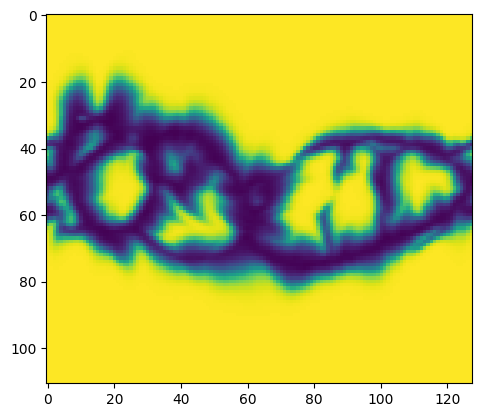

In [8]:
plt.imshow(data[10])

In [9]:
create_gif_from_array(data,'/app/')

GIF saved to /app/image.gif


In [6]:
val_dataset = SimpleDataset(BASE_DIR, cr_val, scale_up=1)

Loading simulations: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 324/324 [00:50<00:00,  6.41it/s]


In [12]:
train_dataset[0]['x'].shape

torch.Size([1, 111, 128])

In [13]:
train_dataset[0]['y'].shape

torch.Size([139, 111, 128])

In [15]:
create_gif_from_array(train_dataset[0]['y'].numpy(),'/app/', 'prediction.gif')

GIF saved to /app/prediction.gif


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=128, out_channels=139, kernel_size=1),  # output layer
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.net(x)

In [22]:
train_loader = DataLoader(
    train_dataset,
    batch_size=16,        # choose your desired batch size
    shuffle=True,        # shuffle data each epoch
    num_workers=16,       # number of CPU workers for parallel loading
    pin_memory=True      # improves GPU transfer speed
)

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN().to(device)

criterion = nn.MSELoss()                  # example: regression loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# -----------------------------
# Dummy DataLoader (replace with real one)
# -----------------------------
batch_size = 8
num_epochs= 10

for epoch in range(10):  # number of epochs
    model.train()
    running_loss = 0.0

    for batch_idx, batch in enumerate(train_loader):
        x, y_true = batch['x'].to(device), batch['x'].to(device)

        # Forward pass
        y_pred = model(x)
        loss = criterion(y_pred, y_true)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.6f}")

    print(f"Epoch [{epoch+1}/{num_epochs}] finished | Avg Loss: {running_loss/len(train_loader):.6f}")

Epoch [1/10], Step [10/37], Loss: 0.134147
Epoch [1/10], Step [20/37], Loss: 0.076179
Epoch [1/10], Step [30/37], Loss: 0.058746
Epoch [1/10] finished | Avg Loss: 0.109807


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([7, 1, 111, 128])) that is different to the input size (torch.Size([7, 139, 111, 128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/10], Step [10/37], Loss: 0.036711
Epoch [2/10], Step [20/37], Loss: 0.032599
Epoch [2/10], Step [30/37], Loss: 0.029423
Epoch [2/10] finished | Avg Loss: 0.034283
Epoch [3/10], Step [10/37], Loss: 0.030687
Epoch [3/10], Step [20/37], Loss: 0.032659
Epoch [3/10], Step [30/37], Loss: 0.029771
Epoch [3/10] finished | Avg Loss: 0.028676
Epoch [4/10], Step [10/37], Loss: 0.027679
Epoch [4/10], Step [20/37], Loss: 0.027789
Epoch [4/10], Step [30/37], Loss: 0.030611
Epoch [4/10] finished | Avg Loss: 0.027595
Epoch [5/10], Step [10/37], Loss: 0.029017
Epoch [5/10], Step [20/37], Loss: 0.030968
Epoch [5/10], Step [30/37], Loss: 0.024911
Epoch [5/10] finished | Avg Loss: 0.027453
Epoch [6/10], Step [10/37], Loss: 0.023378
Epoch [6/10], Step [20/37], Loss: 0.031120
Epoch [6/10], Step [30/37], Loss: 0.029981
Epoch [6/10] finished | Avg Loss: 0.027274
Epoch [7/10], Step [10/37], Loss: 0.022488
Epoch [7/10], Step [20/37], Loss: 0.024040
Epoch [7/10], Step [30/37], Loss: 0.022979
Epoch [7/10

In [ ]:
def calculate_params(input_dims, )